# Data set from Kaggle 
https://www.kaggle.com/lava18/google-play-store-apps/downloads/google-play-store-apps.zip/6

# Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.
Content
Each app (row) has values for catergory, rating, size, and more.

In [13]:
import math
import re
import pdb
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import t, sem
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [14]:
# Hide deprecated warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Load data from the folder where I uploaded the csv file
data = pd.read_csv('/Users/AirMorena/Desktop/final_proj/csv/google_play_store/googleplaystore.csv')

In [16]:
data.shape

(10841, 13)

In [17]:
#data.info()

In [18]:
#data.isnull().count()

In [19]:
# how many unique apps in the dataset
len(data['App'].unique())

9660

In [20]:
#missing data
# sum the missing values and sort the featureas descending (highest to lowest)
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
# create a dataframe with the sum of missing values per feature and the percentage it represents
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000
Genres,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


In [21]:
# get rid of missing values for all the features
data.dropna(inplace = True)

In [22]:
data.shape

(9360, 13)

In [23]:
#data.head()

In [24]:
sorted_by_rating = data.sort_values(by=['Rating'], ascending=False)
#sorted_by_rating.head()

In [25]:
sorted_by_installs = data.sort_values(by=['Installs'], ascending=False)
#sorted_by_installs.head()

In [26]:
sorted_by_reviews = data.sort_values(by=['Reviews'], ascending=False)
#sorted_by_reviews.head()

In [27]:
#data.columns.tolist()

In [28]:
# data description 
#data.info()

In [29]:
# check data types
#data.dtypes

In [30]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [31]:
# how many of each?
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Type'])
#df
df2=df.reset_index()

In [32]:
# count does not take nan into account (total 10841), so 2 nan and 1 zero --> data cleaning
df2.groupby('Type').count()
#6.89% of apps are paid


,index
Type,
Free,8715
Paid,645


In [33]:
#_=plt.figure(figsize=(12,8))
#sns.distplot(data_price['Price'], bins=10 )

In [34]:
# Among paid Apps:
#data_price['Price'].describe()
# the median price among paid apps is 2.99 dollars, mean is 13.9 dollars
# the min 0.99 
# the max 400

In [35]:
#### Among paid Apps, what are the prices?
#data[condition_app_paid & condition_app_price]
#data_price=data[condition_app_paid & condition_app_price]
#condition_app_paid=(data['Type']=='Paid')
#condition_app_paid
#condition_app_price=(data['Price']>0)
#condition_app_price
#_=sns.boxplot(data_price['Price'])
#plt.title("price by app")

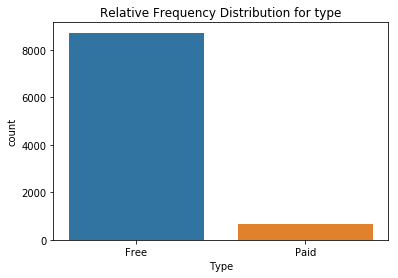

In [36]:
# Visualize frequencies of each type of content
content_paid = data['Type']
# Visualize the barplot
_=sns.countplot(content_paid).plot(kind='bar', color='blue')
_=plt.title('Relative Frequency Distribution for type')

In [37]:
########

In [38]:
# clean Installs
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [39]:
# replace comma by nothing and convert to int,and save it into data['Installs'] 
data['Installs']=data['Installs'].str.replace('+','').str.replace(',','').astype(int)

In [40]:
# check that there are no weird characters in the feature installs left
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [41]:
data['Installs'].describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

Text(0.5, 1.0, 'Number of Installs by app')

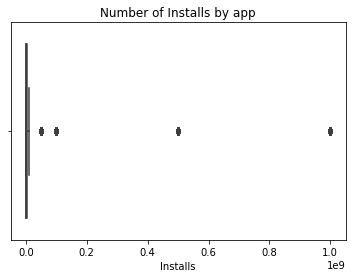

In [42]:
# boxplot
#vizualisation distribution of number of installs values
_=sns.boxplot(data['Installs'])
plt.title("Number of Installs by app")

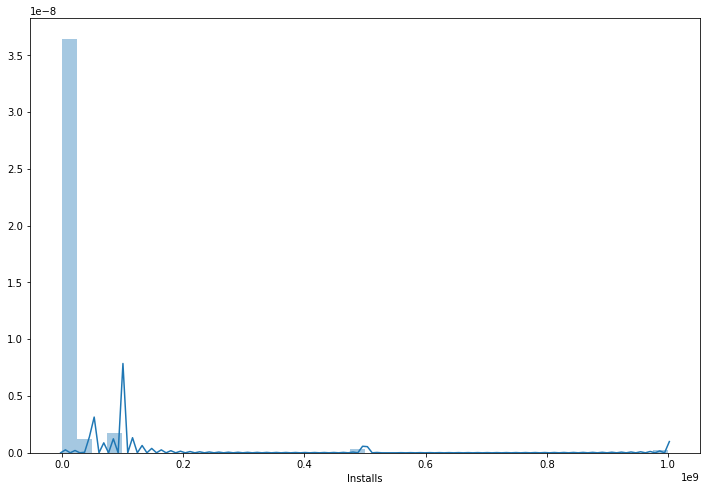

In [43]:
# Vizualise installs distribution
_=plt.figure(figsize=(12,8))
sns.distplot(data['Installs'], bins=40 )

In [44]:
######## time variables

In [45]:
#if the date format comes in datetime, we can also extract the day/month/year using the to_period function
#where 'D', 'M', 'Y' are inputs

data['day'] = pd.DatetimeIndex(data['Last Updated']).day
data['month'] = pd.DatetimeIndex(data['Last Updated']).month
data['year'] = pd.DatetimeIndex(data['Last Updated']).year
data['month_year'] = pd.to_datetime(data['Last Updated']).dt.to_period('M')
#data['month_year'].unique()

In [46]:
######### Price

In [47]:
# remove dollar from Price and store it in Price
data['Price']= data['Price'].str.replace("$","")

In [48]:
data['Price'] = data['Price'].astype(float)

In [49]:
data['Price'].dtypes

dtype('float64')

In [50]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [51]:
data.shape

(9360, 17)

In [52]:
data['Price'] = data['Price'].astype(float)

In [53]:
data['Price'].describe()
#mean average price 0.96 dollar  based on all the app free or paid 

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [54]:
#data[data['Price']>=50].head()

In [55]:
data[data['Price']>=30].count()

App               21
Category          21
Rating            21
Reviews           21
Size              21
Installs          21
Type              21
Price             21
Content Rating    21
Genres            21
Last Updated      21
Current Ver       21
Android Ver       21
day               21
month             21
year              21
month_year        21
dtype: int64

In [56]:
#sorted_by_price = data.sort_values(by=['Price'], ascending=False)
#sorted_by_price.head(21)
# mainly medical, finance, and lifestyle

In [57]:
# Price of over 50 dollars (647 entries)
#data[data['Price']>50].count()
#vizualisation distribution of number of price values
#_=sns.boxplot(data_price['Price'])
#plt.title("distribution of price among paid Apps")

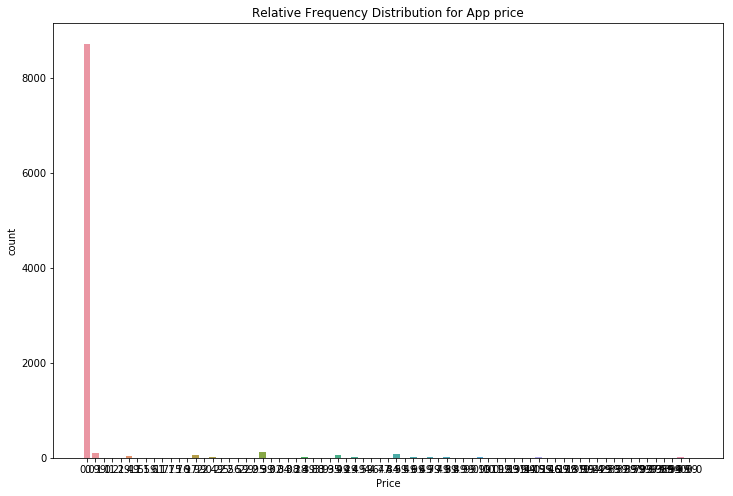

In [58]:
# Visualize frequencies for each price in dollars
_=plt.figure(figsize=(12,8))
content_price = data['Price']
# Visualize the barplot
_=sns.countplot(content_price).plot(kind='bar', color='blue')
_=plt.title('Relative Frequency Distribution for App price')

Text(0.5, 1.0, "Apps by Price'")

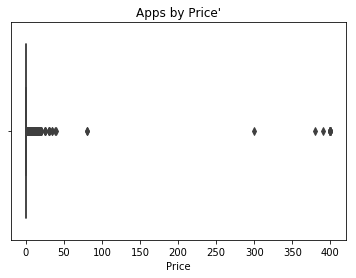

In [59]:
#vizualisation distribution of price values
_=sns.boxplot(data['Price'])
plt.title("Apps by Price'")

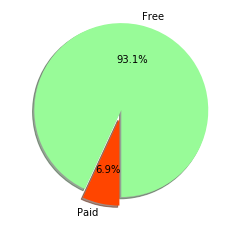

In [60]:
# Data to plot
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)

colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
#plt.title('Percent of Apps free/paid in Google Play store',size = 20)
plt.show()

In [61]:
######## Size

In [62]:
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x))
data['Size'].dtypes

dtype('float64')

In [63]:
data.shape

(9360, 17)

In [64]:
# replace nan by mean
size_array = data[data['Size']!=np.nan]['Size']
#data['Size'].replace(np.nan,size_array.mean())

In [65]:
data['Size']=data['Size'].replace(np.nan,size_array.mean())

In [66]:
# new size uniques (numeric, and no nans)
#data['Size'].unique()

Text(0.5, 1.0, 'Apps by size')

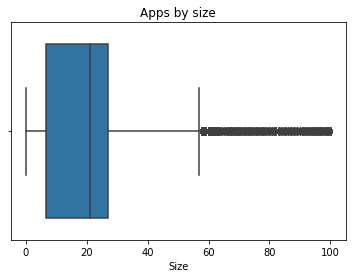

In [67]:
#vizualisation distribution of number of Size values, wo nan
_=sns.boxplot(data['Size'])
plt.title("Apps by size")

In [68]:
############

In [69]:
# Rating

In [70]:
data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

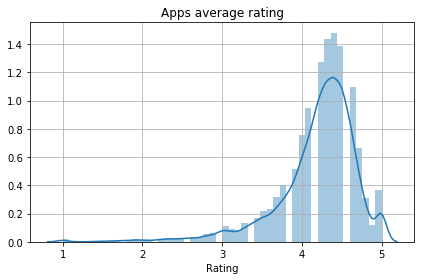

In [71]:
_=sns.distplot(data['Rating'])
plt.title("Apps average rating")
plt.grid(True)
plt.tight_layout()

In [72]:
# Ratug by category

In [73]:
#plt.figure(figsize=(8,6))
#fig = sns.barplot(x=sorted_by_rating['App'][:10], y=sorted_by_rating['Rating'][:10], palette="hls")
#fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
#plt.tight_layout()
#plt.show(fig)

In [74]:
# Reviews

In [75]:
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))
data['Reviews'].dtypes

dtype('int64')

In [76]:
#plt.figure(figsize=(8,6))
#fig = sns.barplot(x=sorted_by_reviews['App'][:10], y=sorted_by_reviews['Reviews'][:10], palette="hls")
#fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
#plt.tight_layout()
#plt.show(fig)

In [77]:
## Feature 'Android Ver'

In [78]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [79]:
# replace varies with device
data['Android Ver']=data['Android Ver'].replace('Varies with device',np.nan)

In [80]:
data['Android Ver'].str.extract('(\d\.\d)', expand=True)

,0
0,4.0
1,4.0
2,4.0
3,4.2
4,4.4
5,2.3
6,4.0
7,4.2
8,3.0
9,4.0


In [81]:
#store it
data['Android Ver']=data['Android Ver'].str.extract('(\d\.\d)', expand=True)

In [82]:
data['Android Ver'].unique()

array(['4.0', '4.2', '4.4', '2.3', '3.0', '4.1', nan, '2.2', '5.0', '6.0',
       '1.6', '1.5', '2.1', '7.0', '4.3', '2.0', '3.2', '5.1', '7.1',
       '8.0', '3.1', '1.0'], dtype=object)

In [83]:
# convert to float
data['Android Ver']=pd.to_numeric(data['Android Ver'])

In [84]:
data['Android Ver'].dtypes

dtype('float64')

In [85]:
data.shape

(9360, 17)

In [86]:
data['Android Ver'].describe()

count    8041.000000
mean        3.869071
std         0.844801
min         1.000000
25%         4.000000
50%         4.100000
75%         4.200000
max         8.000000
Name: Android Ver, dtype: float64

In [87]:
# replace nan by mean
# create an array based on the current ver clean non nulls to look at the distribution
android_ver_clean_array = data[data['Android Ver']!=np.nan]['Android Ver']

Text(0.5, 1.0, 'Apps by android version')

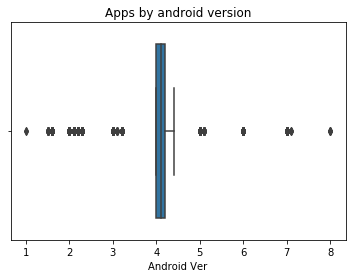

In [88]:
#vizualisation distribution of new ['Android ver'] values non nulls
_=sns.boxplot(android_ver_clean_array )
plt.title("Apps by android version")

In [89]:
# replace nan by mean
data['Android Ver']=data['Android Ver'].replace(np.nan,android_ver_clean_array.mean())

In [90]:
data['Android Ver'].describe()

count    9360.000000
mean        3.869071
std         0.783011
min         1.000000
25%         3.869071
50%         4.000000
75%         4.100000
max         8.000000
Name: Android Ver, dtype: float64

In [91]:
data['Android Ver'].unique()

array([4.        , 4.2       , 4.4       , 2.3       , 3.        ,
       4.1       , 3.86907101, 2.2       , 5.        , 6.        ,
       1.6       , 1.5       , 2.1       , 7.        , 4.3       ,
       2.        , 3.2       , 5.1       , 7.1       , 8.        ,
       3.1       , 1.        ])

In [92]:
##### Feature current ver

In [93]:
data.shape

(9360, 17)

In [94]:
# get the column and extract the first 2 digit and repetition + and return string, finadll returns a list
data['Current Ver_clean'] = data['Current Ver']\
                                    .apply(lambda x: re.findall('[0-9]+\.[0-9]+', 
                                                        str(x))[0] if re.findall('[0-9]+\.[0-9]+', 
                                                        str(x)) else -10000)

In [95]:
data['Current Ver_clean'] = data['Current Ver_clean'].astype(float)

In [96]:
data['Current Ver_clean'].unique() 

array([ 1.00000000e+00,  2.00000000e+00,  1.20000000e+00, -1.00000000e+04,
        1.10000000e+00,  6.10000000e+00,  2.90000000e+00,  2.80000000e+00,
        3.80000000e+00,  3.10000000e+00,  2.20000000e+00,  5.50000000e+00,
        4.00000000e+00,  1.50000000e+00,  1.03000000e+00,  6.00000000e+00,
        6.70000000e+00,  1.60000000e+00,  2.10000000e+00,  1.30000000e+00,
        1.46000000e+00,  1.10000000e+01,  3.00000000e+00,  1.70000000e+00,
        2.50000000e+00,  2.49300000e+00,  1.90000000e+00,  1.37000000e+00,
        2.00000000e-01,  4.47000000e+00,  1.79000000e+00,  2.30000000e+00,
        8.31000000e+00,  1.00000000e+01,  3.20000000e+00,  1.40000000e+00,
        4.60000000e+00,  2.17000000e+00,  5.40000000e+00,  3.30000000e+00,
        1.85000000e+01,  1.91180527e+00,  9.10000000e+00,  1.50000000e+01,
        1.80500000e+01,  5.00000000e+00,  3.12000000e+00,  1.28000000e+00,
        9.00000000e+00,  1.40000000e+01,  3.05000000e+00,  7.00000000e+00,
        1.15000000e+00,  

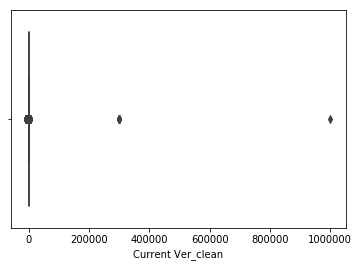

In [97]:
#data['Current Ver_clean'].unique()
_=sns.boxplot(data['Current Ver_clean'])

In [98]:
# drop outliers 

In [99]:
condition=(data['Current Ver_clean']<50) 
#condition=(data['Current Ver_clean']==np.nan)  
len(data[condition])

9309

In [100]:
# outliers dropped
data=data[condition]

In [101]:
data.shape

(9309, 18)

In [113]:
data['Current Ver_clean'].describe()

count    9309.000000
mean        3.145702
std         3.373778
min         0.000000
25%         1.210000
50%         2.400000
75%         3.200000
max        47.100000
Name: Current Ver_clean, dtype: float64

In [102]:
data['Current Ver_clean'].unique()
#there are nan

array([ 1.00000000e+00,  2.00000000e+00,  1.20000000e+00, -1.00000000e+04,
        1.10000000e+00,  6.10000000e+00,  2.90000000e+00,  2.80000000e+00,
        3.80000000e+00,  3.10000000e+00,  2.20000000e+00,  5.50000000e+00,
        4.00000000e+00,  1.50000000e+00,  1.03000000e+00,  6.00000000e+00,
        6.70000000e+00,  1.60000000e+00,  2.10000000e+00,  1.30000000e+00,
        1.46000000e+00,  1.10000000e+01,  3.00000000e+00,  1.70000000e+00,
        2.50000000e+00,  2.49300000e+00,  1.90000000e+00,  1.37000000e+00,
        2.00000000e-01,  4.47000000e+00,  1.79000000e+00,  2.30000000e+00,
        8.31000000e+00,  1.00000000e+01,  3.20000000e+00,  1.40000000e+00,
        4.60000000e+00,  2.17000000e+00,  5.40000000e+00,  3.30000000e+00,
        1.85000000e+01,  1.91180527e+00,  9.10000000e+00,  1.50000000e+01,
        1.80500000e+01,  5.00000000e+00,  3.12000000e+00,  1.28000000e+00,
        9.00000000e+00,  1.40000000e+01,  3.05000000e+00,  7.00000000e+00,
        1.15000000e+00,  

In [103]:
# create an array based on the current ver clean non nulls to look at the distribution
current_ver_clean_array = data[data['Current Ver_clean']>-10]['Current Ver_clean']

In [104]:
# replace nan by
data['Current Ver_clean']=data['Current Ver_clean'].replace(-10000,current_ver_clean_array.mean())

In [105]:
data['Current Ver_clean'].unique()

array([ 1.        ,  2.        ,  1.2       ,  3.1457024 ,  1.1       ,
        6.1       ,  2.9       ,  2.8       ,  3.8       ,  3.1       ,
        2.2       ,  5.5       ,  4.        ,  1.5       ,  1.03      ,
        6.        ,  6.7       ,  1.6       ,  2.1       ,  1.3       ,
        1.46      , 11.        ,  3.        ,  1.7       ,  2.5       ,
        2.493     ,  1.9       ,  1.37      ,  0.2       ,  4.47      ,
        1.79      ,  2.3       ,  8.31      , 10.        ,  3.2       ,
        1.4       ,  4.6       ,  2.17      ,  5.4       ,  3.3       ,
       18.5       ,  1.91180527,  9.1       , 15.        , 18.05      ,
        5.        ,  3.12      ,  1.28      ,  9.        , 14.        ,
        3.05      ,  7.        ,  1.15      ,  3.9       ,  3.4       ,
        2.19      ,  9.7       ,  4.9       ,  5.2       ,  3.55      ,
        7.3       ,  5.1       ,  4.1       , 12.2       ,  1.12      ,
        0.9       ,  3.24      , 18.7       ,  3.19      ,  6.4 

In [107]:
data.shape

(9309, 18)

Text(0.5, 1.0, 'Apps by current version number')

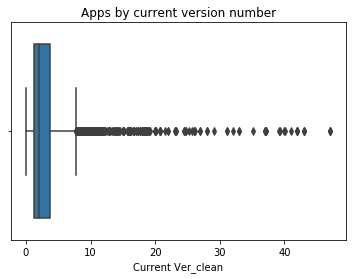

In [108]:
#vizualisation distribution of current ver clean non nulls values
_=sns.boxplot(current_ver_clean_array)
plt.title("Apps by current version number")

In [109]:
#data.describe()

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9309 entries, 0 to 10840
Data columns (total 18 columns):
App                  9309 non-null object
Category             9309 non-null object
Rating               9309 non-null float64
Reviews              9309 non-null int64
Size                 9309 non-null float64
Installs             9309 non-null int64
Type                 9309 non-null object
Price                9309 non-null float64
Content Rating       9309 non-null object
Genres               9309 non-null object
Last Updated         9309 non-null object
Current Ver          9309 non-null object
Android Ver          9309 non-null float64
day                  9309 non-null int64
month                9309 non-null int64
year                 9309 non-null int64
month_year           9309 non-null period[M]
Current Ver_clean    9309 non-null float64
dtypes: float64(5), int64(5), object(7), period[M](1)
memory usage: 1.3+ MB


In [111]:
# Export data to my chosen folder (still outliers)
data.to_csv("/Users/AirMorena/Desktop/final_proj/csv/google_playstore_apps_clean_with_outliers.csv", index=False, encoding='utf-8')

In [112]:
# remove outliers?